In [22]:
from statsmodels.formula.api import logit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [23]:
churn = pd.read_csv('./churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [24]:
model = logit("has_churned ~ time_since_first_purchase * time_since_last_purchase", data = churn).fit()

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5


In [25]:
# criando dados para validar nosso modelo
time_since_first_purchase = np.arange(-2, 4.1, 0.1)
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

p = product(time_since_first_purchase, time_since_last_purchase)
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])
explanatory_data

,time_since_first_purchase,time_since_last_purchase
0,-2.0,-1.0
1,-2.0,-0.9
2,-2.0,-0.8
3,-2.0,-0.7
4,-2.0,-0.6
...,...,...
4326,4.0,5.6
4327,4.0,5.7
4328,4.0,5.8
4329,4.0,5.9


In [26]:
prediction_data = explanatory_data.assign(
    has_churned = model.predict(explanatory_data))
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

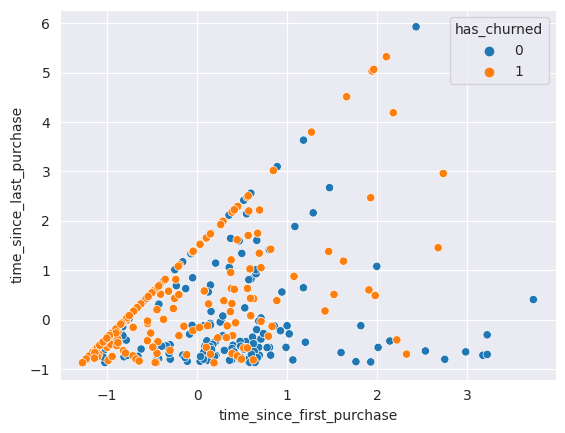

In [27]:
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn,
                hue="has_churned")
plt.show()

<AxesSubplot: xlabel='time_since_first_purchase', ylabel='time_since_last_purchase'>

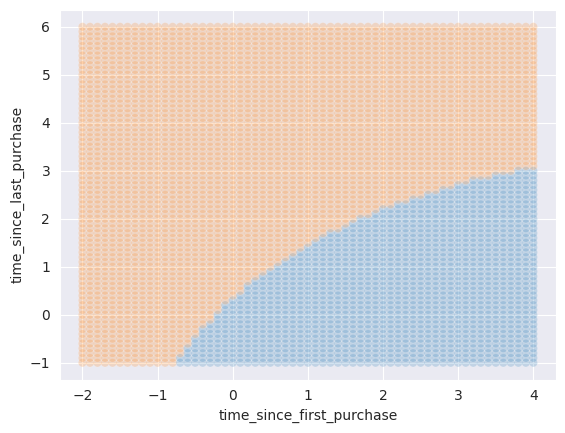

In [30]:
# usando dados de predição
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data,
                hue="most_likely_outcome",
                alpha=0.2,
                legend=False)

Podemos ver a normalização dos dados

## Como capturar a acurácia de um modelo assim?

In [36]:
conf_matrix  = model.pred_table()
conf_matrix

array([[102.,  98.],
       [ 53., 147.]])

Temos 98 falsos positivos e 53 falsos negativos